In [2]:
import networkx as nx
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import matplotlib.colors as mcolors

In [3]:
df = pd.DataFrame
df = pd.read_csv("/local/2014-03-03-am.csv", header='infer')

In [4]:
#df1 = df[['client','AP']]
id = '29dfb1d8e6f3b438df2ebdc0cbac2b17627729cb'
id2 = 'dceda7cd13e0d24eae79b2b89175764f8be2fe7d'
times = df.query('client == @id or client == @id2')
times.head()

,Unnamed: 0,timestamp,client,AP
1,107832,2014-03-03 00:00:30,29dfb1d8e6f3b438df2ebdc0cbac2b17627729cb,Bldg1AP13
143,107974,2014-03-03 00:15:48,dceda7cd13e0d24eae79b2b89175764f8be2fe7d,Bldg1AP13
307,108138,2014-03-03 00:30:35,29dfb1d8e6f3b438df2ebdc0cbac2b17627729cb,Bldg1AP13
449,108280,2014-03-03 00:46:13,dceda7cd13e0d24eae79b2b89175764f8be2fe7d,Bldg1AP13
599,108430,2014-03-03 01:00:42,29dfb1d8e6f3b438df2ebdc0cbac2b17627729cb,Bldg1AP13


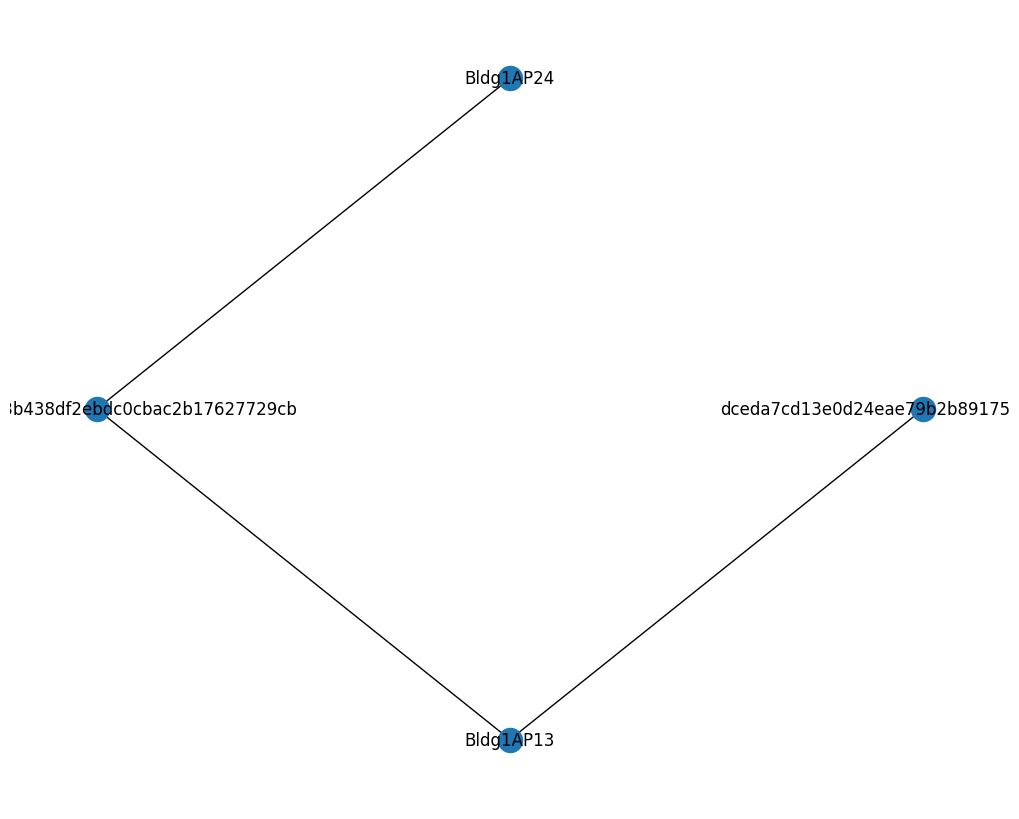

In [10]:
G = nx.from_pandas_edgelist(times, 'client', 'AP')
plt.figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)

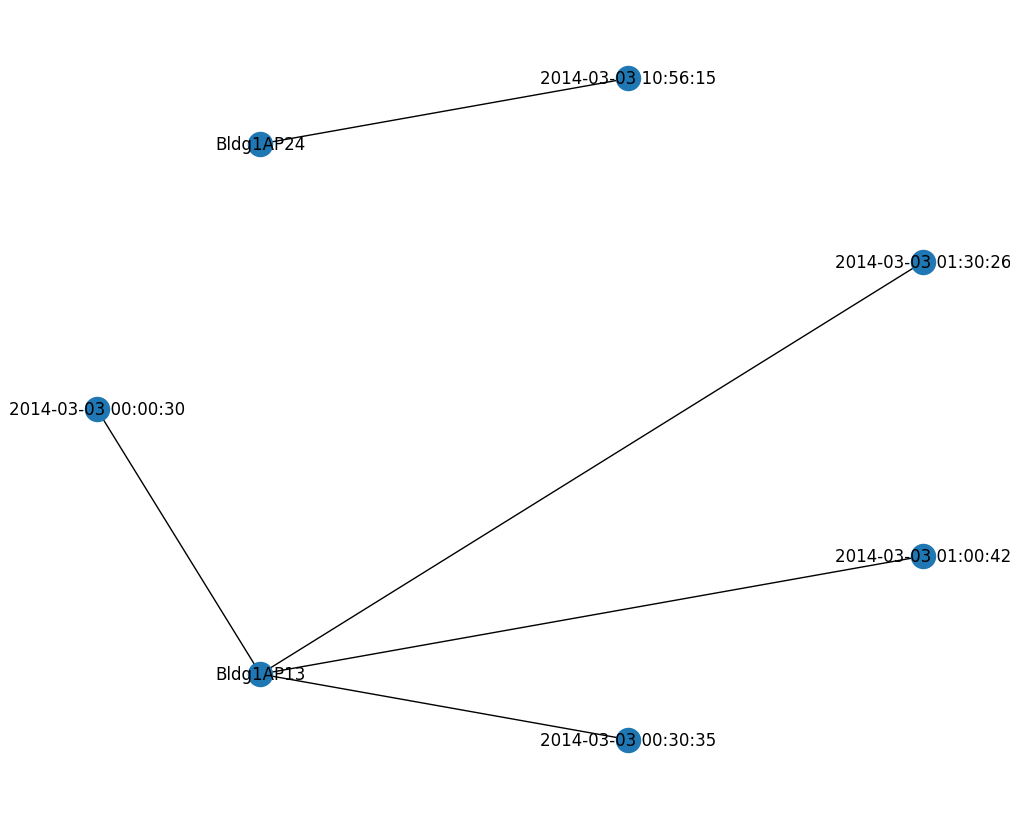

In [11]:
id = '29dfb1d8e6f3b438df2ebdc0cbac2b17627729cb'
timestamp = df.query('client == @id')
G = nx.from_pandas_edgelist(timestamp, 'timestamp', 'AP')
plt.figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)

## One user trajectory on a x,y coordinate map

In [5]:
df_loc = pd.read_csv("/local/APlocations.txt", sep=",")
x_coord = df_loc['x_coordinate(m)']
y_coord = df_loc['y_coordinate(m)']
df_loc.head()

,AP,x_coordinate(m),y_coordinate(m),floor
0,Bldg1AP1,21534,32313,2.0
1,Bldg1AP2,21534,32313,2.0
2,Bldg1AP3,21534,32313,3.0
3,Bldg1AP4,21534,32313,3.0
4,Bldg1AP5,21534,32313,4.0


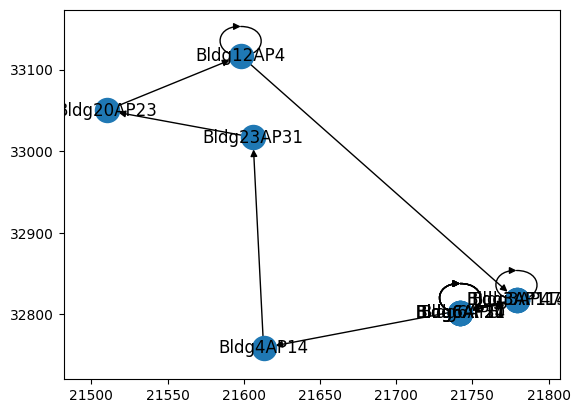

In [6]:
id = '49448d1dd86cfbde1437f330fb132fcd1178ad18'
one_client = df.query('client == @id')
one_client=one_client.rename(columns = {'Unnamed: 0':'indx'})

g = nx.empty_graph(0, nx.DiGraph()) #initialize an empty graph

indeces = one_client['indx'].values.tolist()
counter = 0

for i in range(len(indeces)-1):
    a = one_client.loc[one_client['indx'] == indeces[i], 'AP']
    b = one_client.loc[one_client['indx'] == indeces[i+1], 'AP']
    g.add_edges_from(zip(a, b), weight = counter, node_size=700)
    counter += 1
      
    
#plt.figure(figsize=(10, 8))
fig, ax = plt.subplots()
positions = {}
for node in list(g.nodes()):
    if node not in positions.keys():
        x = df_loc.loc[df_loc['AP'] == node, 'x_coordinate(m)'].iloc[0]
        y = df_loc.loc[df_loc['AP'] == node, 'y_coordinate(m)'].iloc[0]
        coords = [int(x), int(y)]
        positions[node] = coords
pos = positions
color = random.choice(list(mcolors.CSS4_COLORS.keys()))
nx.draw(g, pos=pos,ax=ax)
nx.draw_networkx_labels(g, pos=pos)
plt.axis("on")
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.show()

## Multiple trajectories on a x,y coordinate map

In [7]:
df_loc = pd.read_csv("/local/APlocations.txt", sep=",")
x_coord = df_loc['x_coordinate(m)']
y_coord = df_loc['y_coordinate(m)']
df_loc.head()
#filter = (df_loc['x_coordinate(m)']>21000) & (df_loc['x_coordinate(m)']<22500) & (df_loc['y_coordinate(m)']>32400) & (df_loc['y_coordinate(m)']< 34000)
#filtered_loc = df_loc.loc[filter]

,AP,x_coordinate(m),y_coordinate(m),floor
0,Bldg1AP1,21534,32313,2.0
1,Bldg1AP2,21534,32313,2.0
2,Bldg1AP3,21534,32313,3.0
3,Bldg1AP4,21534,32313,3.0
4,Bldg1AP5,21534,32313,4.0


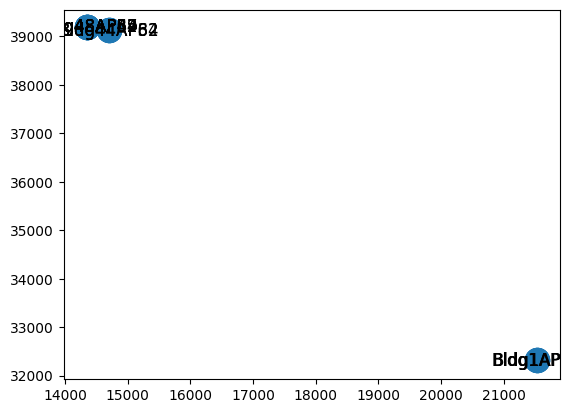

In [8]:
id = 'eb09444684d745596e8ec2ced910ff3baf5c53c5'
id2 = '29dfb1d8e6f3b438df2ebdc0cbac2b17627729cb'
id3 = 'dceda7cd13e0d24eae79b2b89175764f8be2fe7d'
graphs = []
positions = {}
for id in [id, id2, id3]:
    one_client = df.query('client == @id')
    #df_merged = pd.merge(one_client, df_loc, on='AP', how="left")
    one_client=one_client.rename(columns = {'Unnamed: 0':'indx'})

    g = nx.empty_graph(0, nx.DiGraph()) #initialize an empty graph

    indeces = one_client['indx'].values.tolist()
    counter = 0

    for i in range(len(indeces)-1):
        a = one_client.loc[one_client['indx'] == indeces[i], 'AP']
        b = one_client.loc[one_client['indx'] == indeces[i+1], 'AP']
        g.add_edges_from(zip(a, b), weight = counter, node_size=700)
        counter += 1
    #pos=nx.get_node_attributes(G,'pos')
    #labels = nx.get_edge_attributes(G,'weight')
    graphs.append(g)
      
    
#plt.figure(figsize=(10, 8))
fig, ax = plt.subplots()
for g in graphs:
    positions = {}
    for node in list(g.nodes()):
        if node not in positions.keys():
            x = df_loc.loc[df_loc['AP'] == node, 'x_coordinate(m)'].iloc[0]
            y = df_loc.loc[df_loc['AP'] == node, 'y_coordinate(m)'].iloc[0]
            coords = [int(x), int(y)]
            positions[node] = coords
    pos = positions
    color = random.choice(list(mcolors.CSS4_COLORS.keys()))
    #nx.draw(g, pos=pos, ax=ax)
    #nx.draw(G, pos=pos, node_size=1500, ax=ax)  # draw nodes and edges
    #nx.draw_networkx_labels(g, pos=pos)
    #nx.draw(g, pos=pos, connectionstyle='arc3, rad = 0.1', with_labels=True, edge_color = color)
    
    nx.draw(g, pos=pos,ax=ax)
    nx.draw_networkx_labels(g, pos=pos)  # draw node labels/names
    # draw edge weights
    #labels = nx.get_edge_attributes(G, 'weight')
    #nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, ax=ax)
    plt.axis("on")
    #ax.set_xlim(0, 11)
    #ax.set_ylim(0,11)
    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.show()
    

## Trajectories with no location

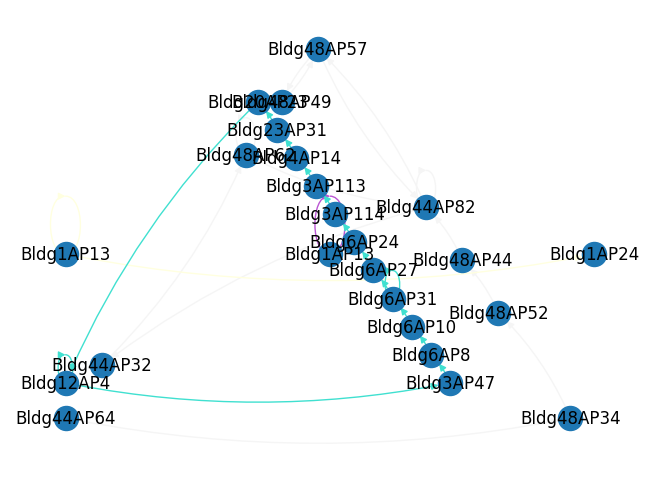

In [10]:
id = 'eb09444684d745596e8ec2ced910ff3baf5c53c5'
id2 = '29dfb1d8e6f3b438df2ebdc0cbac2b17627729cb'
id3 = 'dceda7cd13e0d24eae79b2b89175764f8be2fe7d'
id4 = '49448d1dd86cfbde1437f330fb132fcd1178ad18'
graphs = []
positions = {}
for id in [id, id2, id3, id4]:
    one_client = df.query('client == @id')
    #df_merged = pd.merge(one_client, df_loc, on='AP', how="left")
    one_client=one_client.rename(columns = {'Unnamed: 0':'indx'})

    g = nx.empty_graph(0, nx.DiGraph()) #initialize an empty graph

    indeces = one_client['indx'].values.tolist()
    counter = 0

    for i in range(len(indeces)-1):
        a = one_client.loc[one_client['indx'] == indeces[i], 'AP']
        b = one_client.loc[one_client['indx'] == indeces[i+1], 'AP']
        g.add_edges_from(zip(a, b), label = id, node_size=700, edge_color = color)
        counter += 1
    #pos=nx.get_node_attributes(G,'pos')
    #labels = nx.get_edge_attributes(G,'weight')
    graphs.append(g)
      
    
#plt.figure(figsize=(10, 8))
#f = nx.compose(graphs[0],graphs[1])
#h = nx.compose(f, graphs[2])
for g in graphs:
    color = random.choice(list(mcolors.CSS4_COLORS.keys()))
    nx.draw_planar(g, connectionstyle='arc3, rad = 0.1', with_labels=True, edge_color = color)
#nx.draw_planar(h, connectionstyle='arc3, rad = 0.1', with_labels=True)

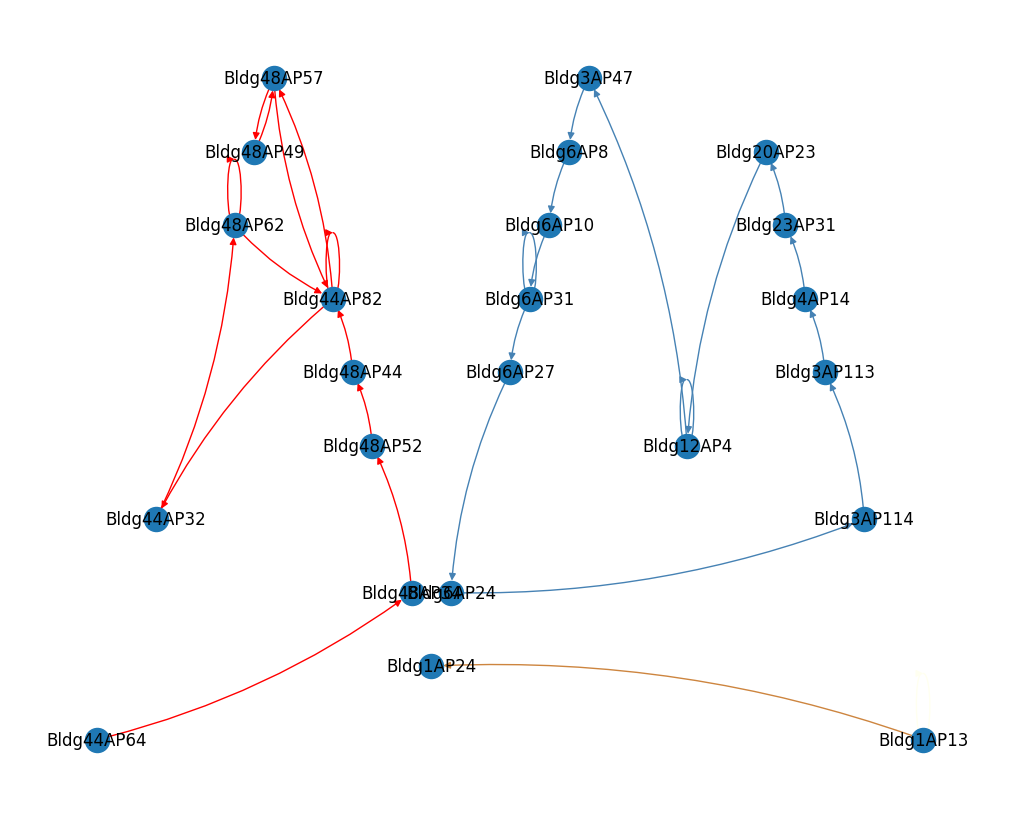

In [11]:
first = graphs[0]
nx.set_edge_attributes(first, 'red', 'color')
for i in range(1, len(graphs)):
    random_color = random.choice(list(mcolors.CSS4_COLORS.keys()))
    curr = graphs[i]
    nx.set_edge_attributes(curr, random_color, 'color')
    #edges = curr.edges()
    first = nx.compose(first,curr)
plt.figure(figsize=(10, 8))
edge_colors = nx.get_edge_attributes(first, 'color')
nx.draw_planar(first, connectionstyle='arc3, rad = 0.1', edge_color=list(edge_colors.values()), with_labels=True)

## Trying to make bigger graph

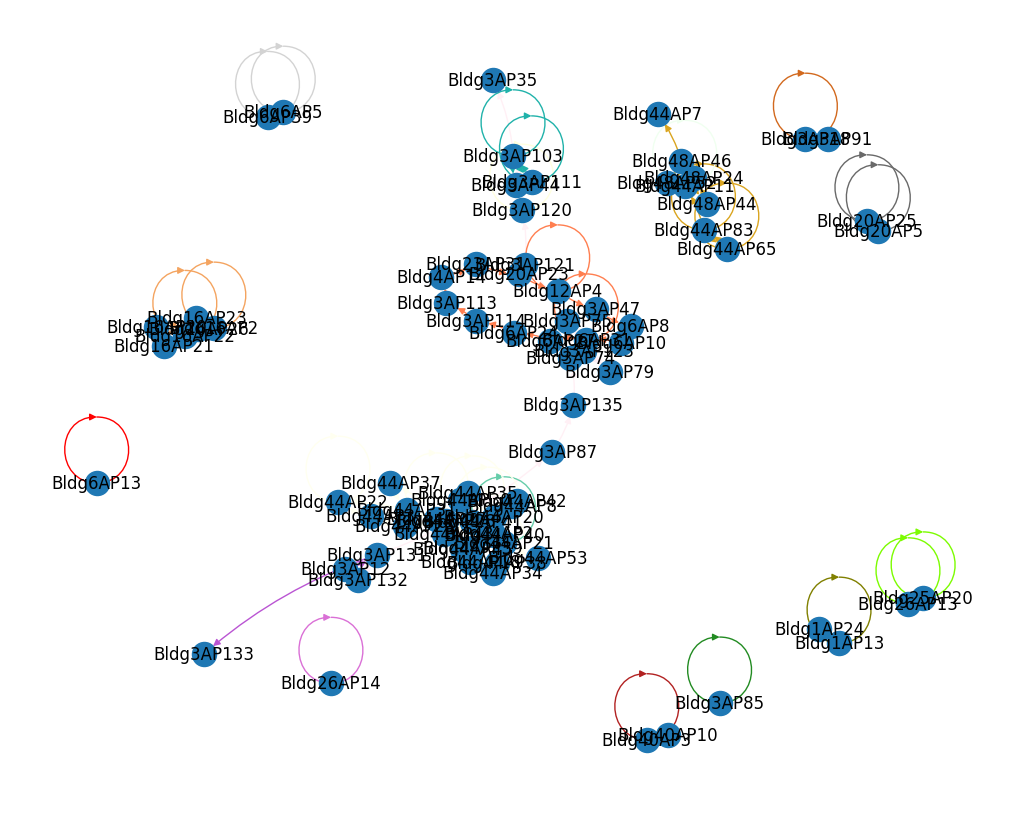

In [12]:
ids = df['client'].head(20).values.tolist()
graphs = []
positions = {}
for id in ids:
    one_client = df.query('client == @id')
    #df_merged = pd.merge(one_client, df_loc, on='AP', how="left")
    one_client=one_client.rename(columns = {'Unnamed: 0':'indx'})

    g = nx.empty_graph(0, nx.DiGraph()) #initialize an empty graph

    indeces = one_client['indx'].values.tolist()
    counter = 0

    for i in range(len(indeces)-1):
        a = one_client.loc[one_client['indx'] == indeces[i], 'AP']
        b = one_client.loc[one_client['indx'] == indeces[i+1], 'AP']
        g.add_edges_from(zip(a, b), label = id, node_size=700, edge_color = color)
        counter += 1
    #pos=nx.get_node_attributes(G,'pos')
    #labels = nx.get_edge_attributes(G,'weight')
    graphs.append(g)
      
    
first = graphs[0]
nx.set_edge_attributes(first, 'red', 'color')
for i in range(1, len(graphs)):
    random_color = random.choice(list(mcolors.CSS4_COLORS.keys()))
    curr = graphs[i]
    nx.set_edge_attributes(curr, random_color, 'color')
    #edges = curr.edges()
    first = nx.compose(first,curr)
plt.figure(figsize=(10, 8))
edge_colors = nx.get_edge_attributes(first, 'color')
nx.draw_spring(first, connectionstyle='arc3, rad = 0.1', edge_color=list(edge_colors.values()), with_labels=True)

## Draw graph with x and y coords

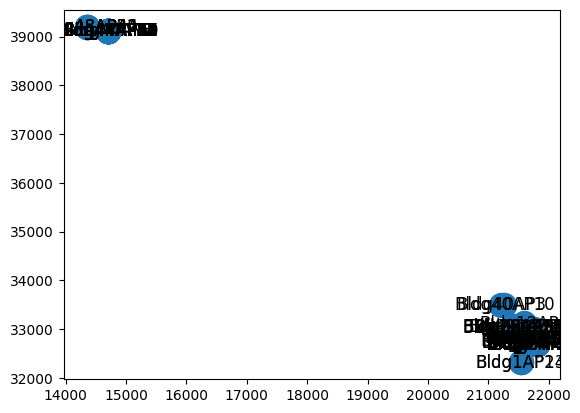

In [14]:
ig, ax = plt.subplots()
for g in graphs:
    positions = {}
    for node in list(g.nodes()):
        if node not in positions.keys():
            x = df_loc.loc[df_loc['AP'] == node, 'x_coordinate(m)'].iloc[0]
            y = df_loc.loc[df_loc['AP'] == node, 'y_coordinate(m)'].iloc[0]
            coords = [int(x), int(y)]
            positions[node] = coords
    pos = positions
    color = random.choice(list(mcolors.CSS4_COLORS.keys()))
    #nx.draw(g, pos=pos, ax=ax)
    #nx.draw(G, pos=pos, node_size=1500, ax=ax)  # draw nodes and edges
    #nx.draw_networkx_labels(g, pos=pos)
    #nx.draw(g, pos=pos, connectionstyle='arc3, rad = 0.1', with_labels=True, edge_color = color)
    
    nx.draw(g, pos=pos,ax=ax)
    nx.draw_networkx_labels(g, pos=pos)  # draw node labels/names
    # draw edge weights
    #labels = nx.get_edge_attributes(G, 'weight')
    #nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, ax=ax)
    plt.axis("on")
    #ax.set_xlim(0, 11)
    #ax.set_ylim(0,11)
    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.show()